<a href="https://colab.research.google.com/github/KrisMatrix/DataScience_Datasets/blob/main/Data_Science_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Science Salaries Dataset

We are going to use a dataset from Kaggle. The dataset is in csv format. Here are the details of the dataset.

| Column |	Description |
| ------ | ------------ |
|work_year |	The year the salary was paid. |
| experience_level	|The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director|
| employment_type	| The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance|
| job_title	| The role worked in during the year. |
| salary	| The total gross salary amount paid.|
| salary_currency	| The currency of the salary paid as an ISO 4217 currency code. |
| salaryinusd	| The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com). |
| employee_residence	| Employee's primary country of residence in during the work year as an ISO 3166 country code. |
| remote_ratio	| The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%) |
| company_location	| The country of the employer's main office or contracting branch as an ISO 3166 country code. |
| company_size	| The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees |(medium) L more than 250 employees (large)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/KrisMatrix/DataScience_Datasets/main/ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# Let's get rid of the index column from the original dataset.
# This is the column with title 'Unnamed: 0'
df = df.drop(["Unnamed: 0"], axis = 1)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
len(df['job_title'].unique()) #there are 50 job title. Not very useful
len(df['salary_currency'].unique())
df['work_year'].unique()      # Data is for 2020-2022 only
df['experience_level'].unique()   #EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director


array(['MI', 'SE', 'EN', 'EX'], dtype=object)

## What is useful information for us to learn or know?

1. What is the average salary in usd for employees who work full time in data science field in the year 2020? 2021? 2022?

2. What is the median salary in usd for employees who work full time in data science field in the 
year 2020? 2021? 2022?

In [5]:
# What is the average salary in usd for employees who work full time in data science field in the year 2020?
# (df['employment_type'] == 'FT') & (df['work_year'] == 2020)
df[(df['employment_type'] == 'FT') & (df['work_year'] == 2020)]['salary_in_usd'].mean()

98542.66176470589

In [6]:
# What is the average salary in usd for employees who work full time in data science field in the year 2021?
df[(df['employment_type'] == 'FT') & (df['work_year'] == 2021)]['salary_in_usd'].mean()

100520.19417475729

In [7]:
# What is the average salary in usd for employees who work full time in data science field in the year 2022?
df[(df['employment_type'] == 'FT') & (df['work_year'] == 2022)]['salary_in_usd'].mean()

125194.79617834395

In [8]:
# What is the median salary in usd for employees who work full time in data science field in the year 2020?
df[(df['employment_type'] == 'FT') & (df['work_year'] == 2020)]['salary_in_usd'].median()

78395.5

In [9]:
# What is the median salary in usd for employees who work full time in data science field in the year 2021?
df[(df['employment_type'] == 'FT') & (df['work_year'] == 2021)]['salary_in_usd'].median()

85000.0

In [10]:
# What is the median salary in usd for employees who work full time in data science field in the year 2022?
df[(df['employment_type'] == 'FT') & (df['work_year'] == 2022)]['salary_in_usd'].median()

120080.0

It looks like both the average and median salary is increasing year after year.

Let's draw a bar chart of these results where one axis is the year and the other
axis is the salary in usd.

In [11]:
def plot_bar(x,y, title, xlabel, ylabel,figsize=(5,5)):
  # Set up plot
  fig, ax = plt.subplots(figsize=figsize)

  # Plot data
  ax.bar(x,y)

  # Customize Plot
  ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

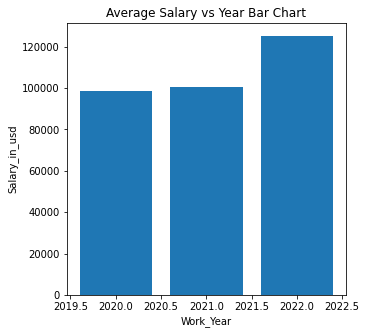

In [12]:
# Bar Plot of Average Salary_in_usd vs Year
x = df['work_year'].unique()
y = [
    df[(df['employment_type'] == 'FT') & (df['work_year'] == 2020)]['salary_in_usd'].mean(),
     df[(df['employment_type'] == 'FT') & (df['work_year'] == 2021)]['salary_in_usd'].mean(),
     df[(df['employment_type'] == 'FT') & (df['work_year'] == 2022)]['salary_in_usd'].mean(),
]

plot_bar(x=x, y=y, title="Average Salary vs Year Bar Chart", xlabel="Work_Year", ylabel="Salary_in_usd")

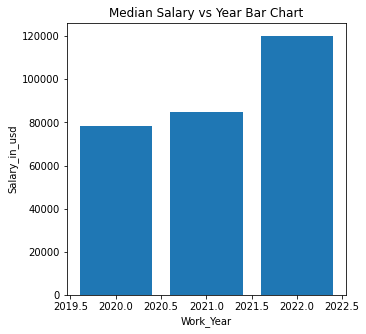

In [13]:
# Bar Plot of Median Salary_in_usd vs Year
x = df['work_year'].unique()
y = [
    df[(df['employment_type'] == 'FT') & (df['work_year'] == 2020)]['salary_in_usd'].median(),
     df[(df['employment_type'] == 'FT') & (df['work_year'] == 2021)]['salary_in_usd'].median(),
     df[(df['employment_type'] == 'FT') & (df['work_year'] == 2022)]['salary_in_usd'].median(),
]

plot_bar(x=x, y=y, title="Median Salary vs Year Bar Chart", xlabel="Work_Year", ylabel="Salary_in_usd")

What is the average and median salary in usd in each country

In [14]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [15]:
country = df['employee_residence'].unique()
print(country)
print("No of Countries = "+str(len(country)))

avg_salary = []
for i in range(len(country)):
  avg_salary.append(df[df['employee_residence'] == country[i]]['salary_in_usd'].mean())
#salary = df[df['employee_residence'] == 'JP']['salary_in_usd']
print(avg_salary)
len(avg_salary)

['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'PL' 'PT' 'CN' 'GR'
 'AE' 'NL' 'MX' 'CA' 'AT' 'NG' 'PH' 'ES' 'DK' 'RU' 'IT' 'HR' 'BG' 'SG'
 'BR' 'IQ' 'VN' 'BE' 'UA' 'MT' 'CL' 'RO' 'IR' 'CO' 'MD' 'KE' 'SI' 'HK'
 'TR' 'RS' 'PR' 'LU' 'JE' 'CZ' 'AR' 'DZ' 'TN' 'MY' 'EE' 'AU' 'BO' 'IE'
 'CH']
No of Countries = 57
[85552.56, 103537.71428571429, 81403.15909090909, 20000.0, 149194.1174698795, 35997.0, 125000.0, 59886.61111111111, 37322.333333333336, 27462.833333333332, 56177.5, 42862.5, 43331.0, 56331.230769230766, 100000.0, 60956.6, 18185.0, 97085.31034482758, 76738.66666666667, 30000.0, 45760.0, 57593.4, 37252.5, 105750.0, 61600.0, 45618.0, 80000.0, 104176.5, 54634.666666666664, 100000.0, 30800.0, 85699.0, 13400.0, 28369.0, 40038.0, 51419.0, 4000.0, 21844.0, 18000.0, 9272.0, 63831.0, 66022.0, 20096.666666666668, 25532.0, 160000.0, 59102.0, 100000.0, 69999.0, 60000.0, 100000.0, 31875.0, 200000.0, 32974.0, 108042.66666666667, 75000.0, 71444.0, 122346.0]


57

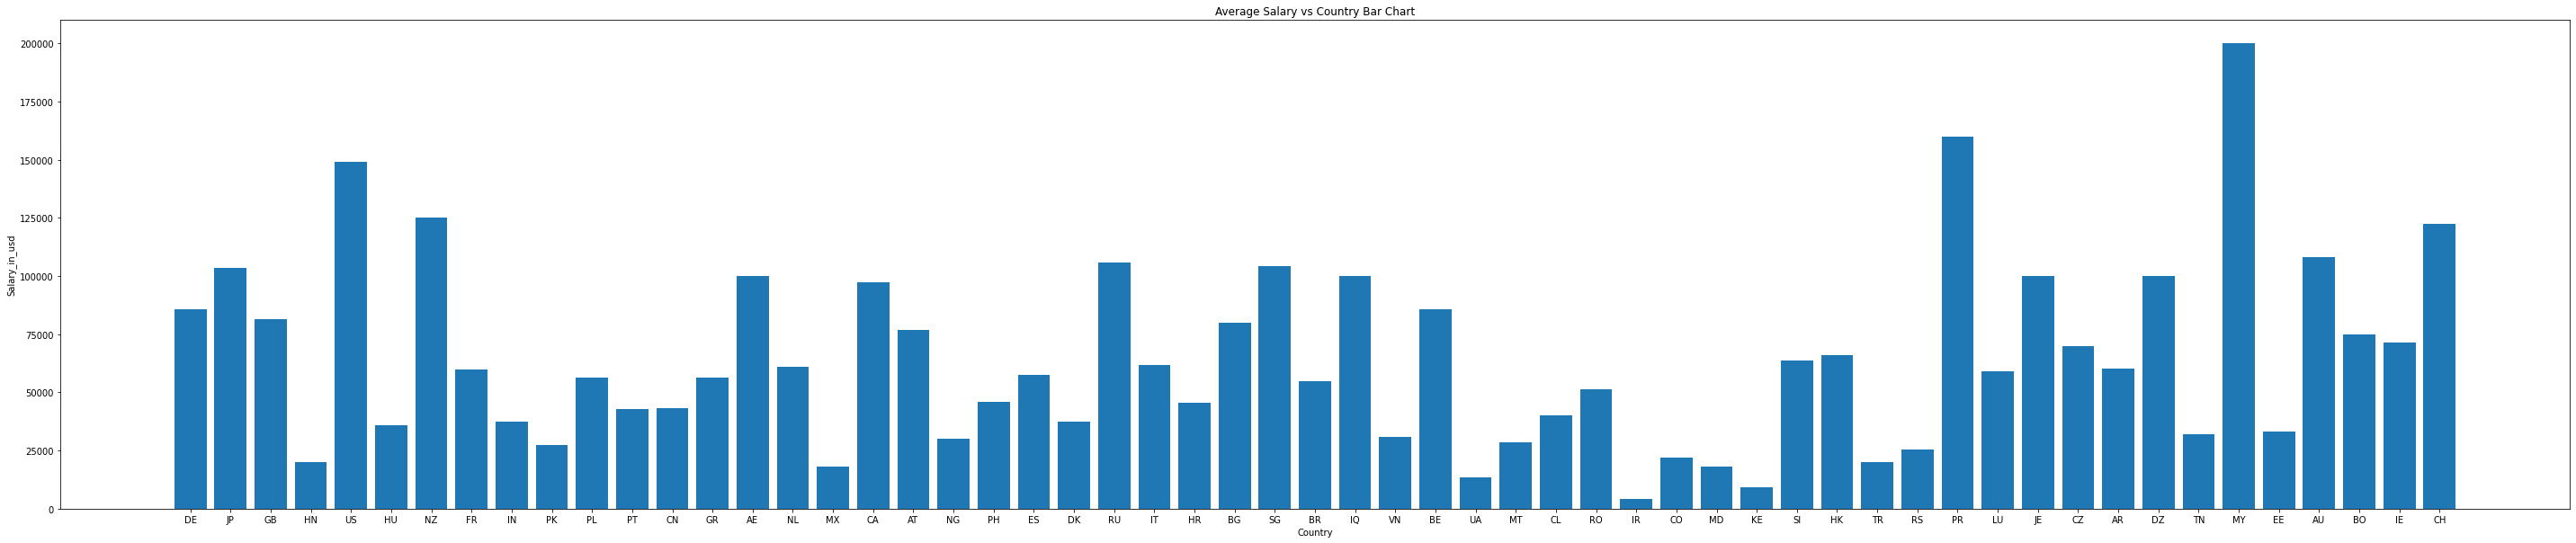

In [16]:
plot_bar(x=country, y=avg_salary, title="Average Salary vs Country Bar Chart", xlabel="Country", ylabel="Salary_in_usd", figsize=(50,10))

In [17]:
country = df['employee_residence'].unique()
print(country)
print("No of Countries = "+str(len(country)))

median_salary = []
for i in range(len(country)):
  median_salary.append(df[df['employee_residence'] == country[i]]['salary_in_usd'].mean())

print(median_salary)
len(median_salary)

['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'PL' 'PT' 'CN' 'GR'
 'AE' 'NL' 'MX' 'CA' 'AT' 'NG' 'PH' 'ES' 'DK' 'RU' 'IT' 'HR' 'BG' 'SG'
 'BR' 'IQ' 'VN' 'BE' 'UA' 'MT' 'CL' 'RO' 'IR' 'CO' 'MD' 'KE' 'SI' 'HK'
 'TR' 'RS' 'PR' 'LU' 'JE' 'CZ' 'AR' 'DZ' 'TN' 'MY' 'EE' 'AU' 'BO' 'IE'
 'CH']
No of Countries = 57
[85552.56, 103537.71428571429, 81403.15909090909, 20000.0, 149194.1174698795, 35997.0, 125000.0, 59886.61111111111, 37322.333333333336, 27462.833333333332, 56177.5, 42862.5, 43331.0, 56331.230769230766, 100000.0, 60956.6, 18185.0, 97085.31034482758, 76738.66666666667, 30000.0, 45760.0, 57593.4, 37252.5, 105750.0, 61600.0, 45618.0, 80000.0, 104176.5, 54634.666666666664, 100000.0, 30800.0, 85699.0, 13400.0, 28369.0, 40038.0, 51419.0, 4000.0, 21844.0, 18000.0, 9272.0, 63831.0, 66022.0, 20096.666666666668, 25532.0, 160000.0, 59102.0, 100000.0, 69999.0, 60000.0, 100000.0, 31875.0, 200000.0, 32974.0, 108042.66666666667, 75000.0, 71444.0, 122346.0]


57

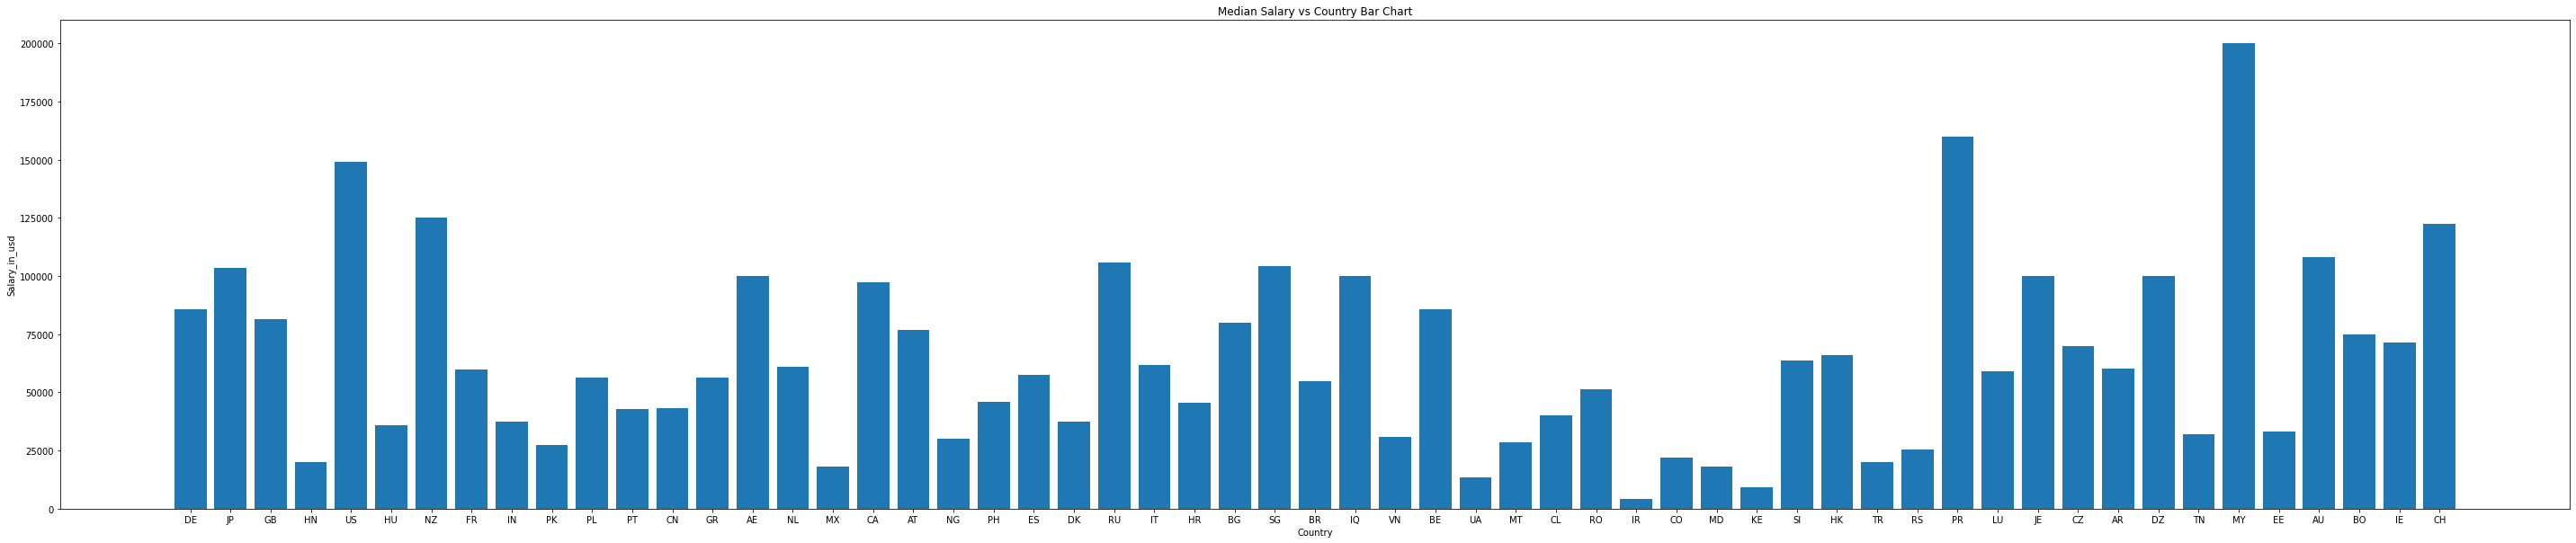

In [18]:
plot_bar(x=country, y=median_salary, title="Median Salary vs Country Bar Chart", xlabel="Country", ylabel="Salary_in_usd", figsize=(50,10))

According to the above charts, the highest average and median salary in USD is in MY (Malaysia). The lowest average and median salary in USD is in IR (Iran).

My country of birth (India) seems to be on the low end (not surprising) but is not the lowest. 

## What else can we learn?

Let's compare salary in small, medium and large companies?

In [19]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [20]:
df[df['company_size'] == 'S']['salary_in_usd'].mean(), df[df['company_size'] == 'M']['salary_in_usd'].mean(), df[df['company_size'] == 'M']['salary_in_usd'].mean()

(77632.67469879518, 116905.46625766871, 116905.46625766871)

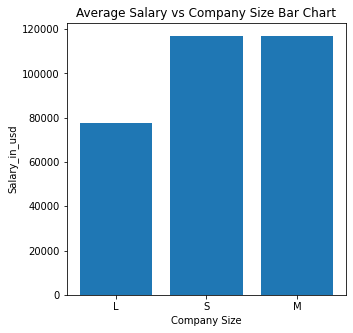

In [21]:
x = df['company_size'].unique()
y = [df[df['company_size'] == 'S']['salary_in_usd'].mean(), df[df['company_size'] == 'M']['salary_in_usd'].mean(), df[df['company_size'] == 'M']['salary_in_usd'].mean()]
plot_bar(x=x, y=y, title="Average Salary vs Company Size Bar Chart", xlabel="Company Size", ylabel="Salary_in_usd", figsize=(5,5))

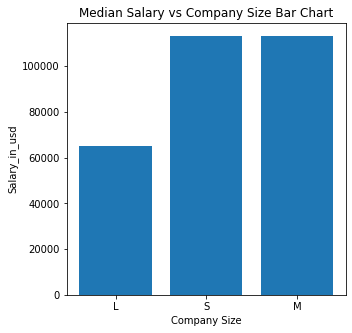

In [22]:
x = df['company_size'].unique()
y = [df[df['company_size'] == 'S']['salary_in_usd'].median(), df[df['company_size'] == 'M']['salary_in_usd'].median(), df[df['company_size'] == 'M']['salary_in_usd'].median()]
plot_bar(x=x, y=y, title="Median Salary vs Company Size Bar Chart", xlabel="Company Size", ylabel="Salary_in_usd", figsize=(5,5))

Interesting, the data suggest that small and medium size companies pay better than large companies. 

In [23]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Let's plot a histogram comparing density of people with salary in usd.

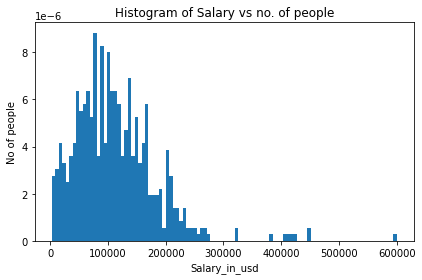

In [24]:
x = df['salary_in_usd']
x
num_bins=100

fig, ax = plt.subplots()

# the histogram of the data

n, bins, patches = ax.hist(x, num_bins, density=True)
ax.set_xlabel('Salary_in_usd')
ax.set_ylabel('No of people')
ax.set_title(r'Histogram of Salary vs no. of people')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

Based on the chart above, We might want to check dumping really high salaries. let's first plot the same histogram where we don't include director level salaries.

In [25]:
# Let's get rid of rows where the experience_level is 'EX'. That means we are dumping executive salaries.
data = df.loc[df['experience_level'] != 'EX']
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


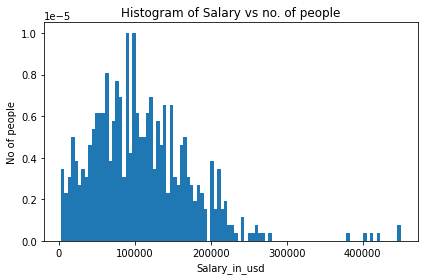

In [26]:
x = data['salary_in_usd']
x
num_bins=100

fig, ax = plt.subplots()

# the histogram of the data

n, bins, patches = ax.hist(x, num_bins, density=True)
ax.set_xlabel('Salary_in_usd')
ax.set_ylabel('No of people')
ax.set_title(r'Histogram of Salary vs no. of people')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

Alright, how about we get rid of outlier salaries as well. For this analysis,
anyone making more than $250k is an outlier.

In [27]:
data = df.loc[df['salary_in_usd'] < 250000]
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


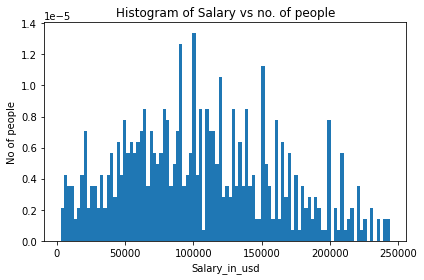

In [28]:
x = data['salary_in_usd']
x
num_bins=100

fig, ax = plt.subplots()

# the histogram of the data

n, bins, patches = ax.hist(x, num_bins, density=True)
ax.set_xlabel('Salary_in_usd')
ax.set_ylabel('No of people')
ax.set_title(r'Histogram of Salary vs no. of people')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

Now with the data dataframe, let's redo our initial analysis.

In [29]:
# What is the average salary in usd for employees who work full time in data science field in the year 2020? 2021? 2022?
print(data[(data['employment_type'] == 'FT') & (data['work_year'] == 2020)]['salary_in_usd'].mean())
print(data[(data['employment_type'] == 'FT') & (data['work_year'] == 2021)]['salary_in_usd'].mean())
print(data[(data['employment_type'] == 'FT') & (data['work_year'] == 2022)]['salary_in_usd'].mean())

79427.0
92260.8
121928.04530744336


In [30]:
# What is the median salary in usd for employees who work full time in data science field in the year 2020? 2021? 2022?
print(data[(data['employment_type'] == 'FT') & (data['work_year'] == 2020)]['salary_in_usd'].median())
print(data[(data['employment_type'] == 'FT') & (data['work_year'] == 2021)]['salary_in_usd'].median())
print(data[(data['employment_type'] == 'FT') & (data['work_year'] == 2022)]['salary_in_usd'].median())

72000.0
82528.0
120000.0


In [31]:
# Let's compare original df results with new data results
print(data[(data['employment_type'] == 'FT') & (data['work_year'] == 2020)]['salary_in_usd'].mean(), df[(df['employment_type'] == 'FT') & (df['work_year'] == 2020)]['salary_in_usd'].mean())
print(data[(data['employment_type'] == 'FT') & (data['work_year'] == 2021)]['salary_in_usd'].mean(), df[(df['employment_type'] == 'FT') & (df['work_year'] == 2021)]['salary_in_usd'].mean())
print(data[(data['employment_type'] == 'FT') & (data['work_year'] == 2022)]['salary_in_usd'].mean(), df[(df['employment_type'] == 'FT') & (df['work_year'] == 2022)]['salary_in_usd'].mean())

79427.0 98542.66176470589
92260.8 100520.19417475729
121928.04530744336 125194.79617834395


As expected removing the outliers and executive level salaries significantly reduced the salaries. 

What is the salary going to be in 2023?

In [32]:
x1 = data[(data['employment_type'] == 'FT') & (data['work_year'] == 2020)]['salary_in_usd'].mean()
x2 = data[(data['employment_type'] == 'FT') & (data['work_year'] == 2021)]['salary_in_usd'].mean()
x3 = data[(data['employment_type'] == 'FT') & (data['work_year'] == 2022)]['salary_in_usd'].mean()

(x2-x1)/x1 * 100, (x3-x2)/x2 * 100

(16.15798154280031, 32.15585092199868)

The calculation above shows that salary increased from 2020 to 2021 by 16% and from 2021 to 2022 by 32%. If we assume the same trend, the salary change from
2022 to 2023 will be 64%.

In [33]:
x3*(64/100) + x3

199961.9943042071

However, the salary increase from 2021 to 2022 may have been due to COVID inflation and may the 2020-2021 increase is more reasonable. In addition, I doubt that the salary will continue to grow at such a high rate as more new people compete for the role.x
For this reason, I will maintain a 16% salary increase.

In [34]:
x3 * (16/100) + x3

141436.5325566343

### Additional Efforts

Based on feedback by a user rev_96, 

1. Can you create an additional chart(s) by continent. See if each bar can be of a different color. --> Done.
2. It sounds like you want the full country name instead of country code.
3. The heat idea is interesting. Can you expand a bit? Can you pose what you want to see and how it ought to look. Heat map is completely new territory for me.

In [35]:
# we need a new dataset that gives information about country codes
iso_df = pd.read_csv("https://raw.githubusercontent.com/KrisMatrix/DataScience_Datasets/main/ISO_3166_Country_with_Regional_codes.csv")
iso_df.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In this new *iso_df*, the two character country codes are given by **alpha-2** column. The long country name is given by the **name** column. 

I think if we want continents, we need the **region** column. We may also find value in **sub-region** column.

In [36]:
# Original data science dataset
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [37]:
# Let's create some dictionaries so that we can map the emplyee_residence 
region, subregion, country = {}, {} ,{}
for i in range(len(iso_df['alpha-2'])):
  region[iso_df['alpha-2'][i]] = iso_df['region'][i]
  subregion[iso_df['alpha-2'][i]] = iso_df['sub-region'][i]
  country[iso_df['alpha-2'][i]] = iso_df['name'][i]

print(region)
print(subregion)
print(country)

{'AF': 'Asia', 'AX': 'Europe', 'AL': 'Europe', 'DZ': 'Africa', 'AS': 'Oceania', 'AD': 'Europe', 'AO': 'Africa', 'AI': 'Americas', 'AQ': nan, 'AG': 'Americas', 'AR': 'Americas', 'AM': 'Asia', 'AW': 'Americas', 'AU': 'Oceania', 'AT': 'Europe', 'AZ': 'Asia', 'BS': 'Americas', 'BH': 'Asia', 'BD': 'Asia', 'BB': 'Americas', 'BY': 'Europe', 'BE': 'Europe', 'BZ': 'Americas', 'BJ': 'Africa', 'BM': 'Americas', 'BT': 'Asia', 'BO': 'Americas', 'BQ': 'Americas', 'BA': 'Europe', 'BW': 'Africa', 'BV': 'Americas', 'BR': 'Americas', 'IO': 'Africa', 'BN': 'Asia', 'BG': 'Europe', 'BF': 'Africa', 'BI': 'Africa', 'CV': 'Africa', 'KH': 'Asia', 'CM': 'Africa', 'CA': 'Americas', 'KY': 'Americas', 'CF': 'Africa', 'TD': 'Africa', 'CL': 'Americas', 'CN': 'Asia', 'CX': 'Oceania', 'CC': 'Oceania', 'CO': 'Americas', 'KM': 'Africa', 'CG': 'Africa', 'CD': 'Africa', 'CK': 'Oceania', 'CR': 'Americas', 'CI': 'Africa', 'HR': 'Europe', 'CU': 'Americas', 'CW': 'Americas', 'CY': 'Asia', 'CZ': 'Europe', 'DK': 'Europe', 'DJ':

In [38]:
# Let's add the region data columns to the data frames
df['region'] = df['employee_residence'].map(region)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,region
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Europe
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Asia
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Europe
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Americas
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Americas


In [39]:
# Let's go ahead and add subregion and country data frames
df['country'] = df['employee_residence'].map(country)
df['subregion'] = df['employee_residence'].map(subregion)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,region,country,subregion
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Europe,Germany,Western Europe
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Asia,Japan,Eastern Asia
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Europe,United Kingdom of Great Britain and Northern I...,Northern Europe
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Americas,Honduras,Latin America and the Caribbean
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Americas,United States of America,Northern America


Now that we have this data we should be able to draw bar charts by region, subregion and by country.clear

Since these are long strings, lets make them horizonal bar charts.

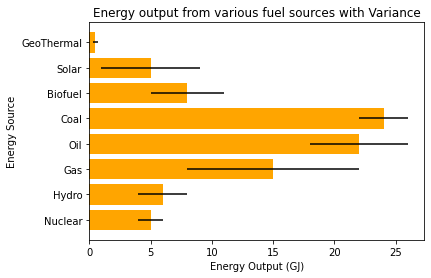

In [40]:
x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel', 'Solar', 'GeoThermal']
energy = [5, 6, 15, 22, 24, 8, 5, 0.5]
variance = [1, 2, 7, 4, 2, 3, 4, 0.2]

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, energy, color='orange', xerr=variance)   #OBSERVE xerr and barh
plt.ylabel("Energy Source")         
plt.xlabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources with Variance")

plt.yticks(x_pos, x)  #OBSERVE yticks

plt.show()

In [59]:
def plot_hbar(x,y, title, xlabel, ylabel, figsize=(5,5),height=0.8):
  plt.barh(x, y, color=['orange','red','green','blue','pink'], height=height)
  plt.ylabel("Country")         
  plt.xlabel("Salary in usd")
  plt.title(title)
  #plt.xticks(x, )  #OBSERVE yticks
  plt.show()

['Europe', 'Asia', 'Americas', 'Oceania', 'Africa']
[69301.74233128835, 52156.11666666667, 141570.616, 112282.0, 40229.4]


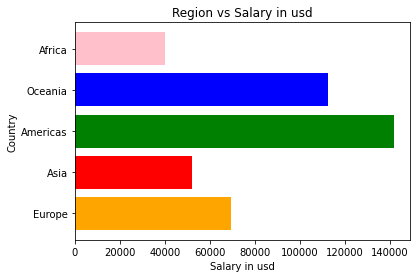

In [60]:
region = df['region'].unique().tolist()
print(region)
salary = []

for i in range(len(region)):
  salary.append(   df[df['region'] == region[i]]['salary_in_usd'].mean()   )

print(salary)
plot_hbar(region, salary, title='Region vs Salary in usd', xlabel='salary_in_usd', ylabel='Country', figsize=(5,5))

['Western Europe', 'Eastern Asia', 'Northern Europe', 'Latin America and the Caribbean', 'Northern America', 'Eastern Europe', 'Australia and New Zealand', 'Southern Asia', 'Southern Europe', 'Western Asia', 'Sub-Saharan Africa', 'South-eastern Asia', 'Northern Africa']
[74629.41818181818, 92679.66666666667, 78789.02040816327, 52932.857142857145, 145008.0914127424, 62746.3125, 112282.0, 34822.89189189189, 54115.41860465116, 65755.71428571429, 23090.666666666668, 78073.28571428571, 65937.5]


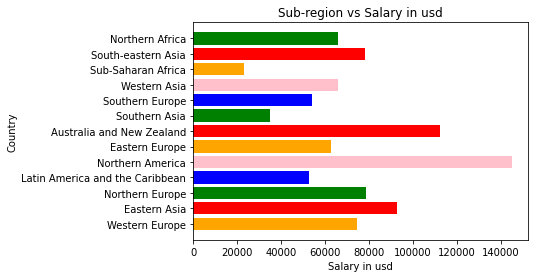

In [61]:
subregion = df['subregion'].unique().tolist()
print(subregion)
salary = []

for i in range(len(subregion)):
  salary.append(   df[df['subregion'] == subregion[i]]['salary_in_usd'].mean()   )

print(salary)
plot_hbar(subregion, salary, title='Sub-region vs Salary in usd', xlabel='salary_in_usd', ylabel='Country', figsize=(5,5))

## Ok. lets draw a geographic heat map

In [66]:
# geopandas in not available by default, therefore we must install it.
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 14.9 MB/s 
     |████████████████████████████████| 6.3 MB 54.5 MB/s 
     |████████████████████████████████| 16.7 MB 59.1 MB/s 


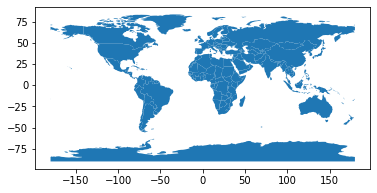

In [189]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

In [233]:
# the world dataframe has too much information. By collapsing into continents we
# get the data to match region from our initial df dataset
continents = world.dissolve(by='continent', aggfunc='sum')
continents.head()

,geometry,gdp_per_cap
continent,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",0.267293
Americas,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",0.376824
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...",1.075919
Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...",1.314298
Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",0.146081


In [234]:
# This is redundant by do it any way. I am getting the mean salaries hash by
# region.

region = df['region'].unique().tolist()
print(region)
salary = {}

for i in range(len(region)):
  salary[region[i]] = df[df['region'] == region[i]]['salary_in_usd'].mean()

print(salary)

['Europe', 'Asia', 'Americas', 'Oceania', 'Africa']
{'Europe': 69301.74233128835, 'Asia': 52156.11666666667, 'Americas': 141570.616, 'Oceania': 112282.0, 'Africa': 40229.4}


In [216]:
# Ok. I am tired of trying to figure out how to get the types matching to work
# the way i want, so i am going to brute force it.
continents['salary'] = 0
continents['salary'][0] = salary['Africa']
continents['salary'][1] = salary['Americas']
continents['salary'][2] = salary['Asia']
continents['salary'][3] = salary['Europe']
continents['salary'][4] = salary['Oceania']

continents.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,geometry,gdp_per_cap,salary
continent,,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",0.267293,40229
Americas,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",0.376824,141570
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...",1.075919,52156
Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...",1.314298,69301
Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",0.146081,112282


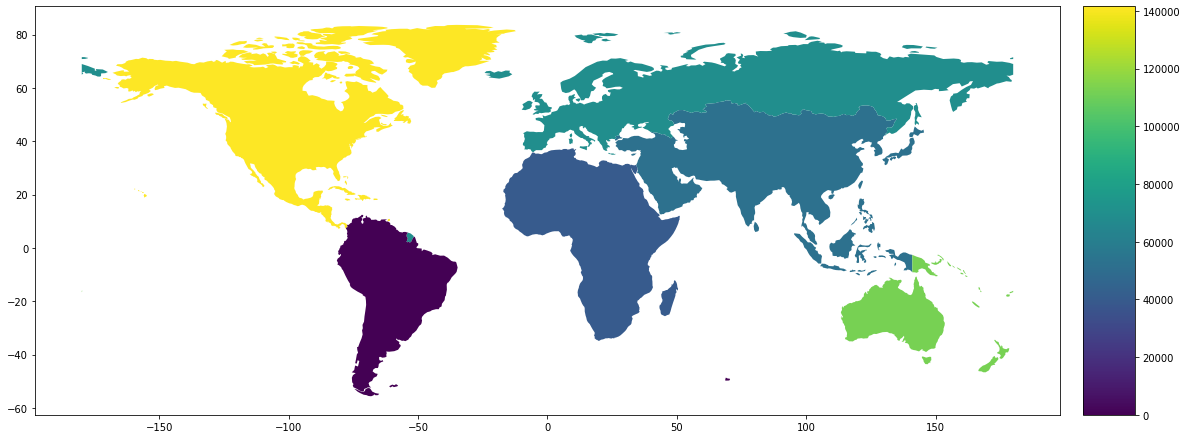

In [232]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1, figsize=(20,20))

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)
continents.plot(column='salary', ax=ax, legend=True, cax=cax)

The map shows neatly that Data scientists in North America have the highest salaries and the Data scientists in south america have the lowest salaries. 

## THE END